In [1]:
#Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image


#My Functions
import src.limpieza_texto as lt


#Set the seaborn theme
sns.set(style="whitegrid")
sns.set(font_scale=1.5)

In [2]:
data = pd.read_csv("data/attacks_clean.csv", encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)
df = data.copy()
df.head()

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal,Time,Species,Year Modern,Date Cleaned,Moon
0,0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.0,2018-06-25,Waxing Gibbous
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.0,2018-06-18,Waxing Crescent
2,2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.0,2018-06-09,Waning Crescent
3,3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.0,2018-06-08,Last Quarter
4,4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.0,2018-06-04,Waning Gibbous


Shark Attacks since the year 1900

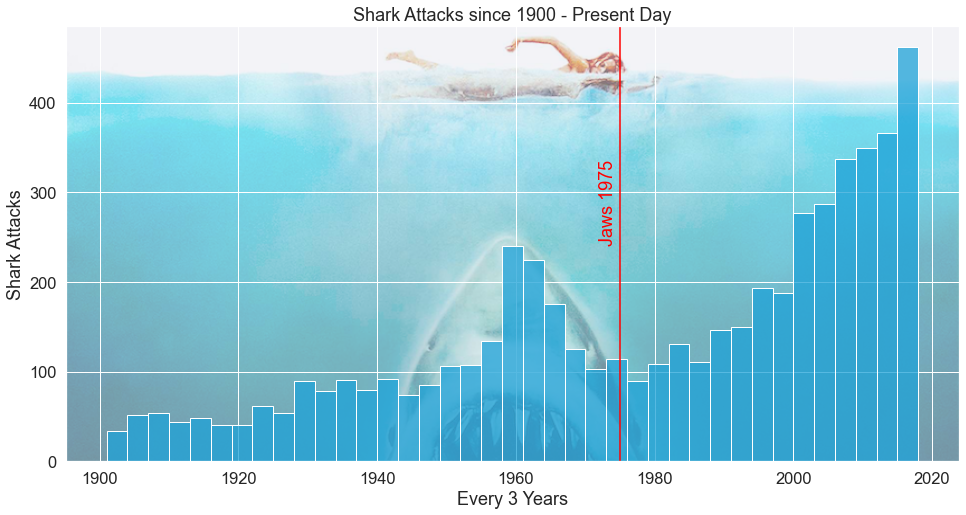

In [3]:
image = plt.imread("images/jaws.png")
fig, ax = plt.subplots(figsize=(16, 8))
ax=sns.histplot(x=df['Year Modern'], binwidth=3, color="#1da2d8")
ax.axvline(x=1975, c="red", label="Jaws released")
ax.text(1972,245,'Jaws 1975', rotation=90, c="red")

ax.set(xlabel="Every 3 Years", ylabel = "Shark Attacks" )
ax.set_title('Shark Attacks since 1900 - Present Day')
ax.imshow(image,
          aspect = ax.get_aspect(),
          extent = ax.get_xlim() + ax.get_ylim(),alpha = 0.5) 
fig.savefig("images/attacks_year_histoplot.png")


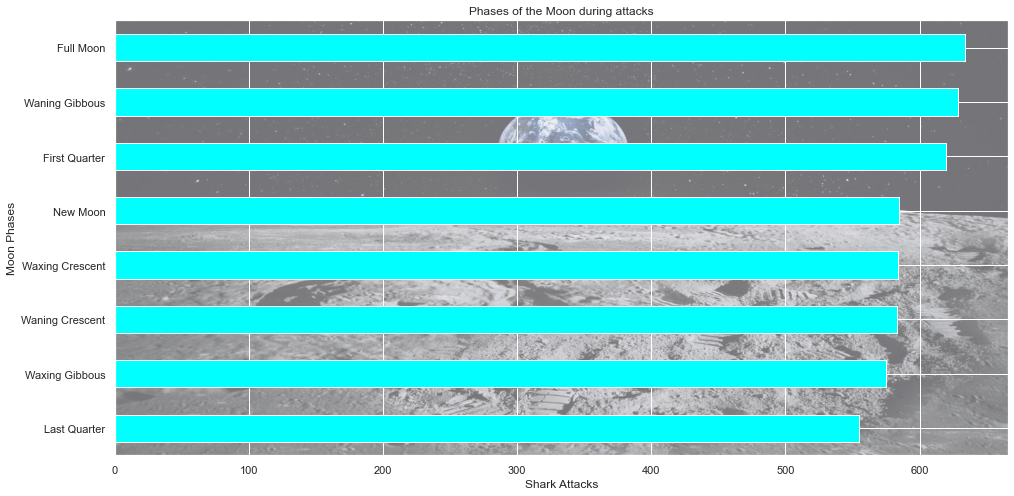

In [17]:
moons =df['Moon'].value_counts().sort_values()
sns.set(style="white")
sns.set(font_scale=1.0)
fig, ax1 = plt.subplots(figsize=(16, 8))
image_moon = plt.imread("images/moon.jpg")
ax1 = moons.plot.barh(color='aqua')
ax1.set(xlabel="Shark Attacks", ylabel = "Moon Phases" )
ax1.set_title('Phases of the Moon during attacks')
ax1.imshow(image_moon,
          aspect = ax1.get_aspect(),
          extent = ax1.get_xlim() + ax1.get_ylim(),alpha = 0.5) 
fig.savefig("images/moon_barplot.png")

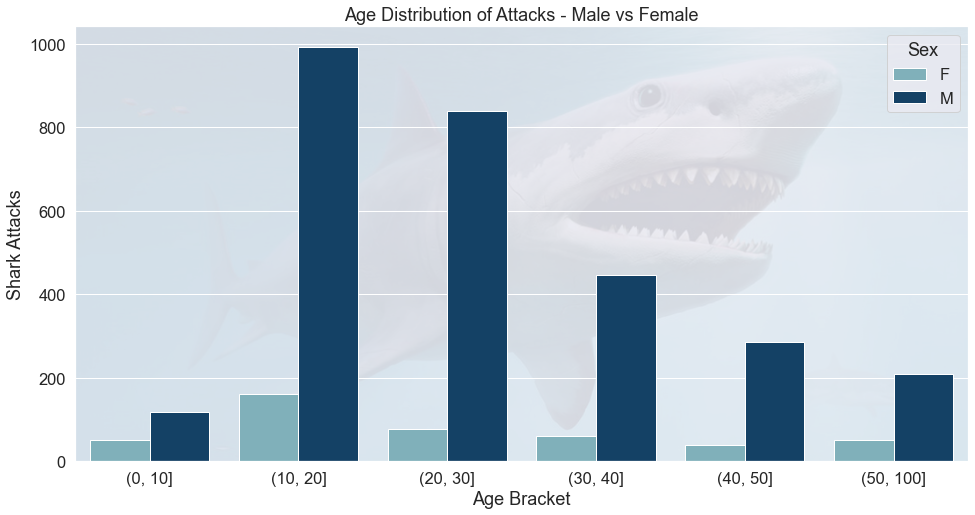

In [18]:
sns.set(style="whitegrid")
sns.set(font_scale=1.5)

age_bucket = pd.cut(df.Age, bins=[0, 10, 20, 30, 40, 50, 100])
fig, ax2 = plt.subplots(figsize=(16, 8))

image2 = plt.imread("images/shark.jpg")
ax2 = sns.countplot(x=age_bucket, hue=df.Sex, palette=['#76b6c4',"#064273"])
ax2.set(xlabel="Age Bracket", ylabel = "Shark Attacks" )
ax2.set_title('Age Distribution of Attacks - Male vs Female')
ax2.imshow(image2,
          aspect = ax2.get_aspect(),
          extent = ax2.get_xlim() + ax2.get_ylim(),alpha = 0.1) 

fig.savefig("images/age_distribution_countplot.png")

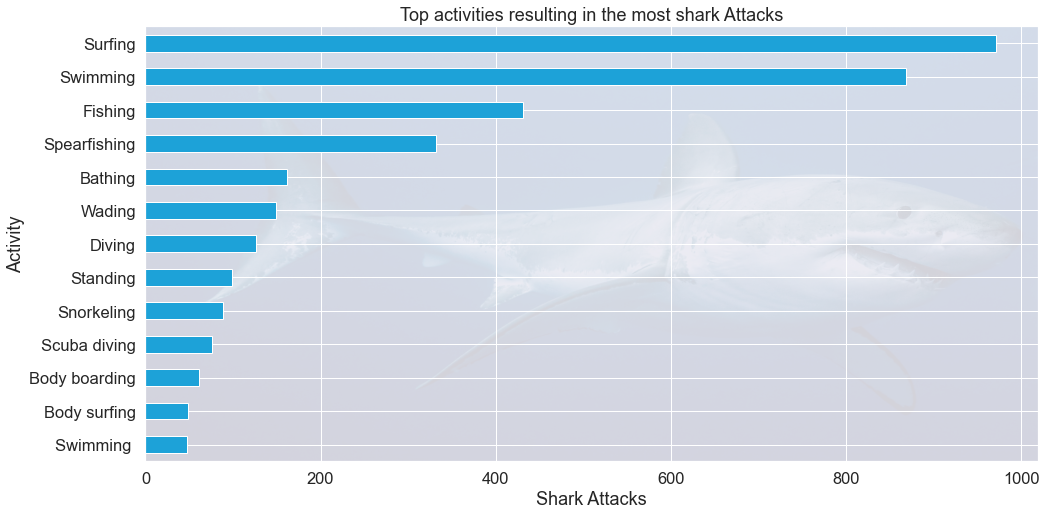

In [19]:
activities =df['Activity'].value_counts().sort_values()

fig, ax3 = plt.subplots(figsize=(16, 8))
image2 = plt.imread("images/shark2.jpg")
ax3 = activities[activities > 40].plot.barh(color='#1da2d8')

ax3.set(xlabel="Shark Attacks", ylabel = "Activity" )
ax3.set_title('Top activities resulting in the most shark Attacks')
ax3.imshow(image2,
          aspect = ax3.get_aspect(),
          extent = ax3.get_xlim() + ax3.get_ylim(),alpha = 0.1) 
fig.savefig("images/activity_distribution_barplot.png")

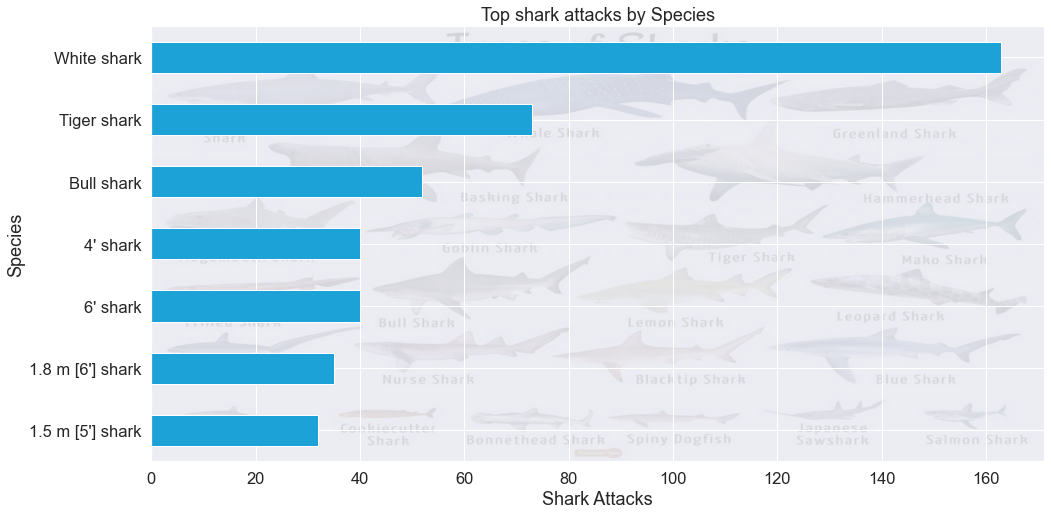

In [20]:
sharks = df['Species'].value_counts().sort_values()
sharks = sharks.drop(['Invalid', 'Questionable', 'Questionable incident', "Shark involvement prior to death unconfirmed","Shark involvement not confirmed", "Shark involvement prior to death was not confirmed"])

fig, ax3 = plt.subplots(figsize=(16, 8))
image2 = plt.imread("images/shark_types.jpeg")
ax3 = sharks[sharks > 30].plot.barh(color='#1da2d8')

ax3.set(xlabel="Shark Attacks", ylabel = "Species" )
ax3.set_title('Top shark attacks by Species')
ax3.imshow(image2,
          aspect = ax3.get_aspect(),
          extent = ax3.get_xlim() + ax3.get_ylim(),alpha = 0.1) 
fig.savefig("images/species_barplot.png")

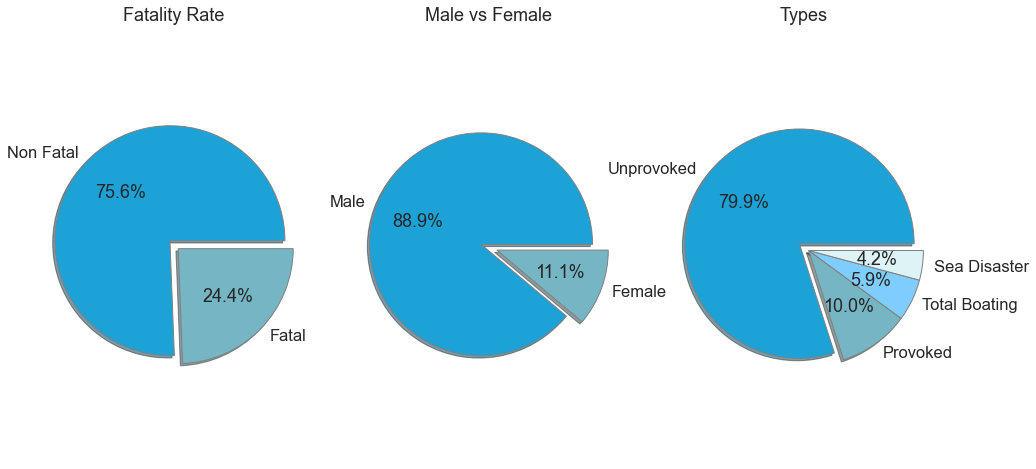

In [21]:
fatal_vals = df['Fatal'].value_counts()
sex_vals = df['Sex'].value_counts()
type_vals = df['Type'].value_counts()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

#Fatal Pie Chart
fatal_index = fatal_vals.index
fatal_values = fatal_vals.values
explode = ( 0.0, .1, ) 
colors = ['#1da2d8','#76b6c4']
axs[0].pie(fatal_values, explode=explode, labels=("Non Fatal", "Fatal"), colors=colors ,autopct='%1.1f%%',wedgeprops={'edgecolor': 'grey'}, shadow=True)
axs[0].axis('equal')
axs[0].set_title("Fatality Rate")

#Sex Pie Chart
sex_index = sex_vals.index
sex_values = sex_vals.values
explode = ( 0.0, .15 ) 
colors = ['#1da2d8','#76b6c4']
axs[1].pie(sex_values, explode=explode, labels=("Male", "Female"), colors=colors ,autopct='%1.1f%%',wedgeprops={'edgecolor': 'grey'}, shadow=True)
axs[1].axis('equal')
axs[1].set_title("Male vs Female")


#Shark Type Pie Chart
total = type_vals.iloc[3:5].sum()
type_vals["Total Boating"] = type_vals["Boating"] + type_vals["Boat"] 
type_vals = type_vals.drop(['Boating', 'Boat', 'Invalid', "Questionable", "Boatomg"])
type_vals.sort_values(ascending=False, inplace=True)

type_index = type_vals.index
type_values = type_vals.values
explode = ( .1, 0, 0, 0) 
colors = ['#1da2d8','#76b6c4','#7fcdff','#def3f6']
axs[2].pie(type_values, explode=explode, labels=type_index, autopct='%1.1f%%', colors=colors,wedgeprops={'edgecolor': 'grey'}, shadow=True)
axs[2].axis('equal')
axs[2].set_title("Types")

fig.savefig("images/pie_charts.png")



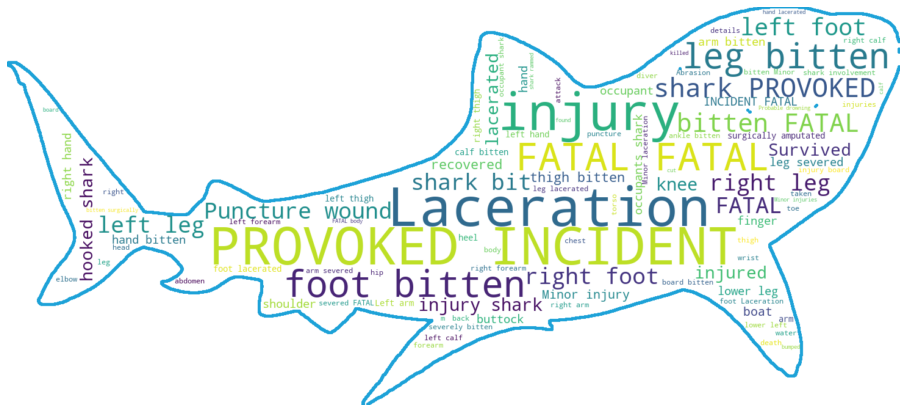

In [22]:
shark_mask = np.array(Image.open("images/shark_outline.png"))
shark_mask[shark_mask == 0] = 255

#word cloud
text = " ".join(str(injury) for injury in df.Injury)
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=100, mask=shark_mask, contour_width=8, contour_color='#1da2d8').generate(text)
plt.figure(figsize=(16,8))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("images/wordcloud_injuries.png")


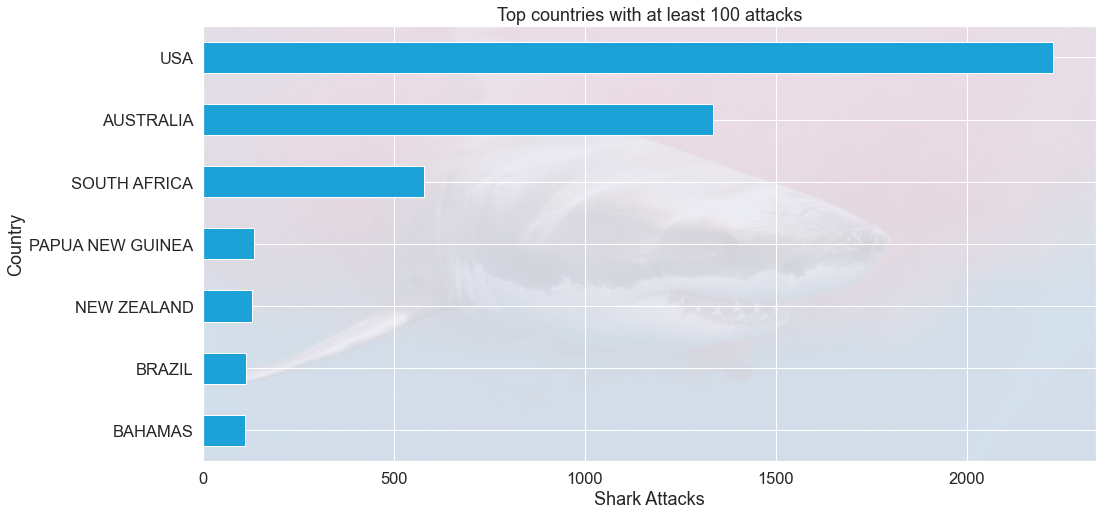

In [24]:
countries_group = df.groupby("Country").filter(lt.filter_countries_by_attack_number)
countries_group_counts = countries_group.Country.value_counts().sort_values()

fig, ax4 = plt.subplots(figsize=(16, 8))
image4 = plt.imread("images/shark3.jpg")
ax4 = countries_group_counts.plot.barh(color='#1da2d8')

ax4.set(xlabel="Shark Attacks", ylabel = "Country" )
ax4.set_title('Top countries with at least 100 attacks')
ax4.imshow(image4,
          aspect = ax4.get_aspect(),
          extent = ax4.get_xlim() + ax4.get_ylim(),alpha = 0.1) 

fig.savefig("images/top_countries_barplot.png")